In [5]:
import numpy as np 
import pandas as pd 

import scipy.stats as stats 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv("train.csv", usecols=['Age', 'Fare', 'Survived'])

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_39359/1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [8]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
x = df.iloc[:, 1:3]
y = df.iloc[:,0]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

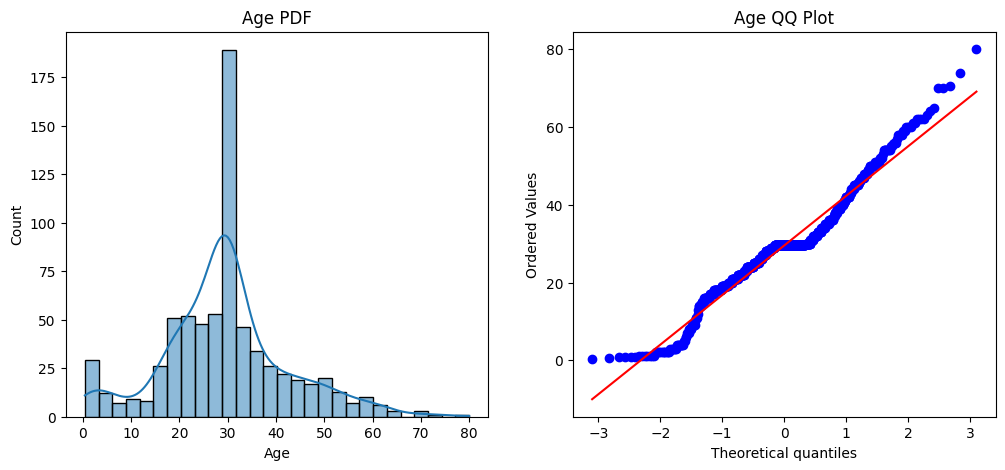

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

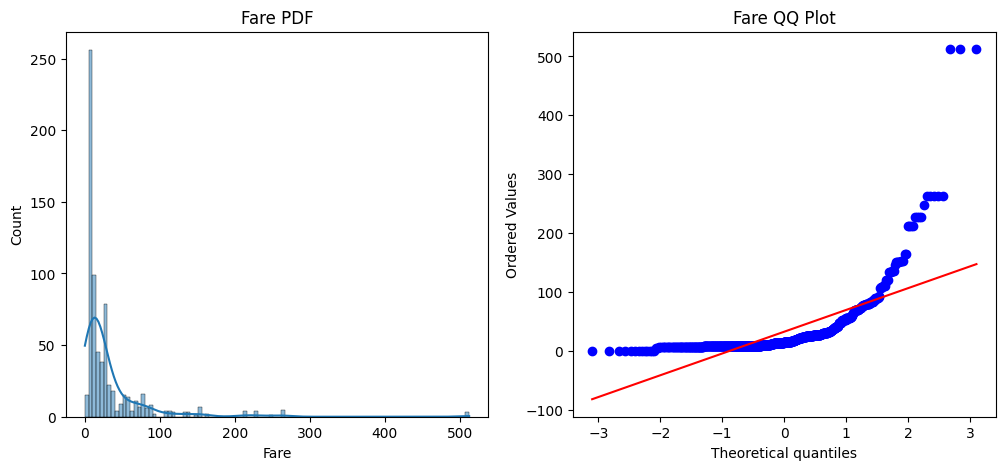

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [15]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [16]:
trf = FunctionTransformer(func=np.log1p)

In [17]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [18]:
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [19]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, x_transformed, y, cv=10, scoring='accuracy')))
print("DT", np.mean(cross_val_score(clf2, x_transformed, y, cv=10, scoring='accuracy')))

LR 0.678027465667915
DT 0.6599999999999999


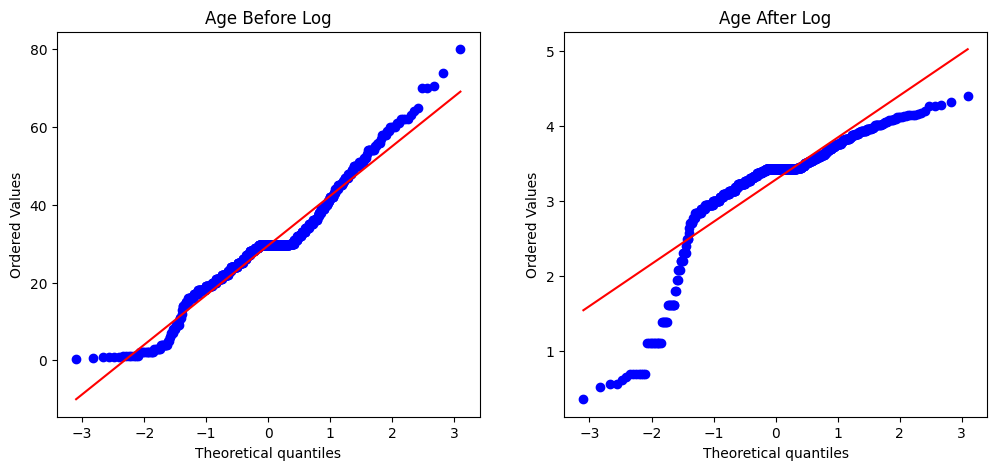

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')


plt.show()

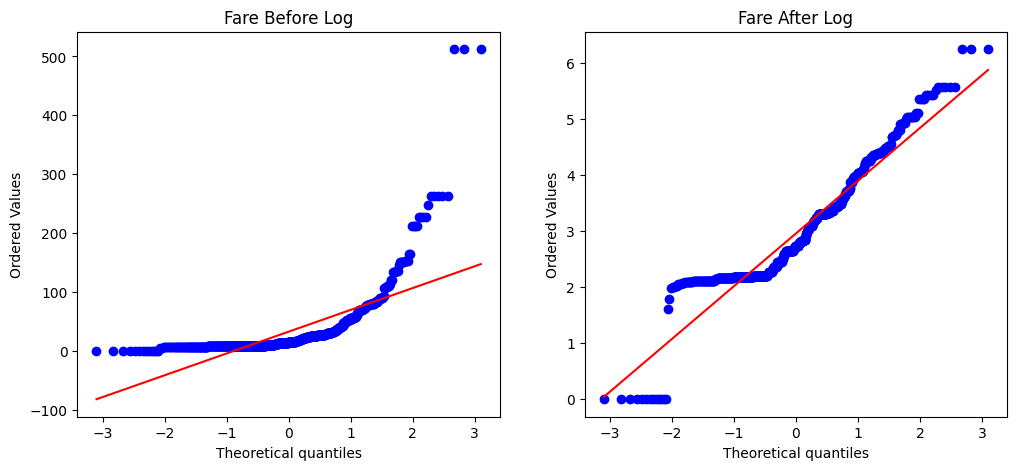

In [21]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')


plt.show()

In [22]:
# iska mtlb ye hai ki , age column par function transform karna ek wrong decision tha, humara graph aur detach hogya apne line se
# fare pe log transform lagaya to , usne acha kam kiya

In [23]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


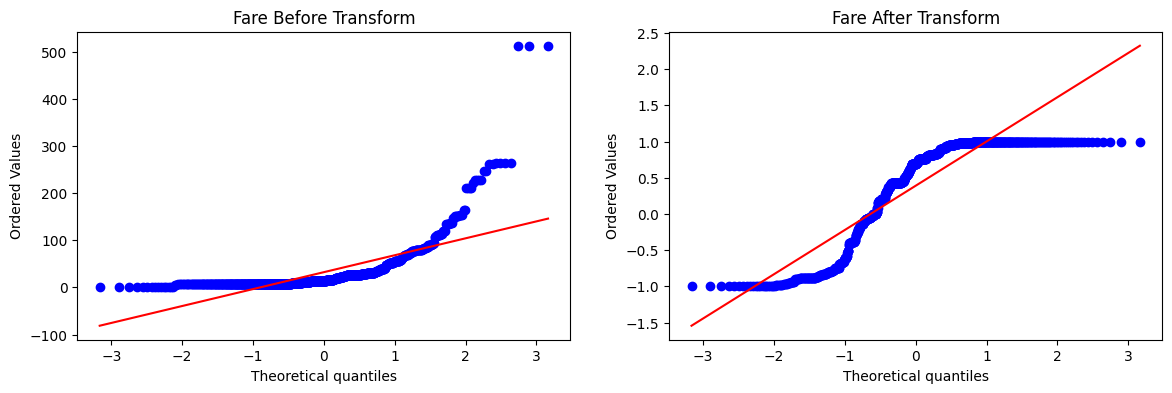

In [25]:
apply_transform(np.sin)

Accuracy 0.6431335830212235


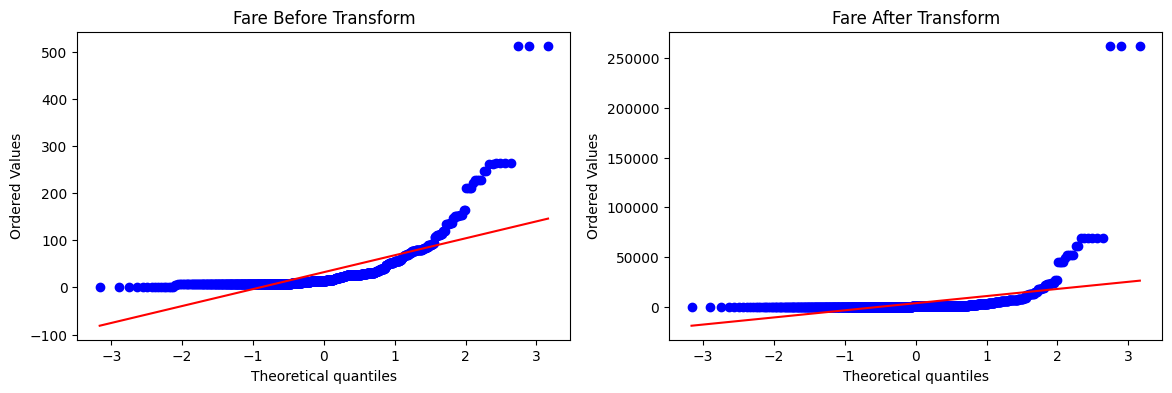

In [26]:
apply_transform(lambda x:x**2)

Accuracy 0.61729088639201


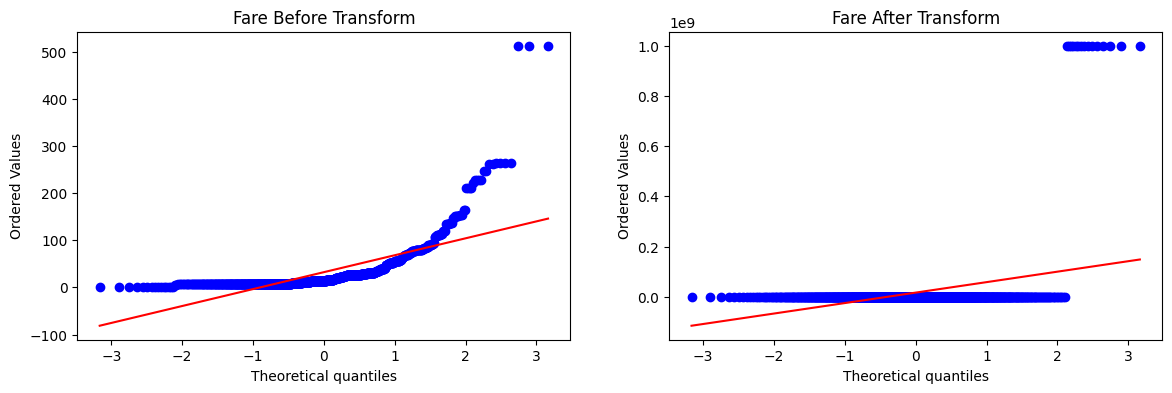

In [27]:
apply_transform(lambda x:1/(x+0.000000001))